# Attenuation correction using a polarimetric approach (EDGE netcdf)

In [1]:
%pylab inline
import numpy as np
import pylab as pl
import wradlib as wrl

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# rainfall conditions (RF)
# read the data
data_phi_RF, attrs_phi_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-P.nc')
data_z_RF, attrs_z_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-Z.nc')

Let's see how the raw differential propagation phase $\phi_{DP}$ looks like.

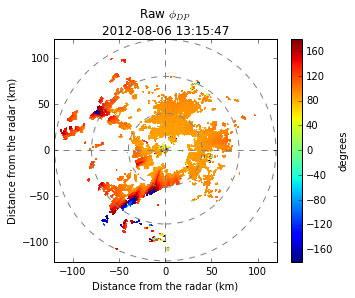

In [3]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_phi_RF), r=attrs_phi_RF['r']/1000., vmin=-180, vmax=180)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Raw $\phi_{DP}$\n' + str(attrs_phi_RF['time']))

In [4]:
np.nanmax(data_phi_RF), np.nanmin(data_phi_RF)

(180.0, -178.58824)

In [5]:
# process the specific differential phase
data_phi, kdp = wrl.dp.process_raw_phidp_vulpiani(data_phi_RF, dr=0.5, L=5, niter=4)

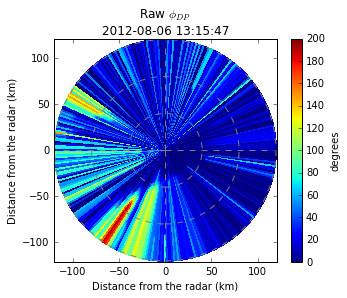

In [6]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_phi), r=attrs_phi_RF['r']/1000., vmin=0, vmax=200)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Raw $\phi_{DP}$\n' + str(attrs_phi_RF['time']))

In [7]:
np.nanmax(data_phi), np.nanmin(data_phi)

(189.76137, -10.004333)

In [8]:
# masking the reconstructed phidp with the original phidp data
mask = np.isnan(data_phi_RF)
masked_phi = np.ma.masked_array(data_phi, mask=mask)

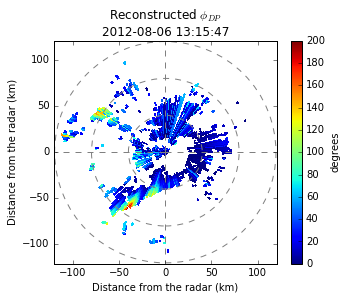

In [9]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(masked_phi), r=attrs_phi_RF['r']/1000., vmin=0, vmax=200)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Reconstructed $\phi_{DP}$\n' + str(attrs_phi_RF['time']))

In [10]:
pia = wrl.atten.pia_from_kdp(kdp, dr=0.5)

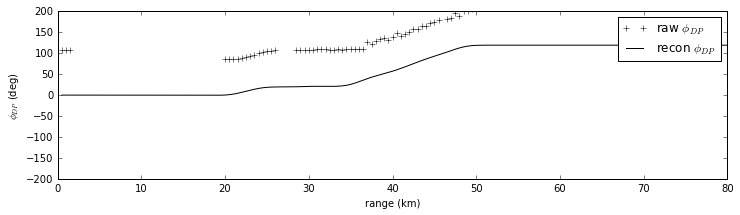

In [11]:
pl.figure(figsize=(12,3))
pl.plot(attrs_phi_RF['r']/1000., data_phi_RF[201,:], 'k+', label='raw $\phi_{DP}$')
pl.plot(attrs_phi_RF['r']/1000., data_phi[201,:], 'k-', label='recon $\phi_{DP}$')
pl.xlim((0,80))
pl.ylim((-200,200))
pl.xlabel('range (km)')
pl.ylabel('$\phi_{DP}$ (deg)')
pl.legend()

In [12]:
Z_uncorr = data_z_RF.copy()
Z_corr = data_z_RF + pia

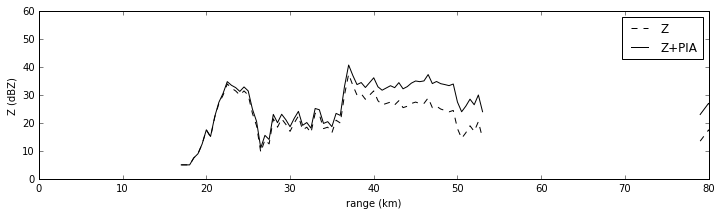

In [13]:
pl.figure(figsize=(12,3))
pl.plot(attrs_phi_RF['r']/1000., Z_uncorr[201,:], 'k--', label='Z')
pl.plot(attrs_phi_RF['r']/1000., Z_corr[201,:], 'k-', label='Z+PIA')
pl.xlim((0,80))
pl.ylim((0,60))
pl.xlabel('range (km)')
pl.ylabel('Z (dBZ)')
pl.legend()

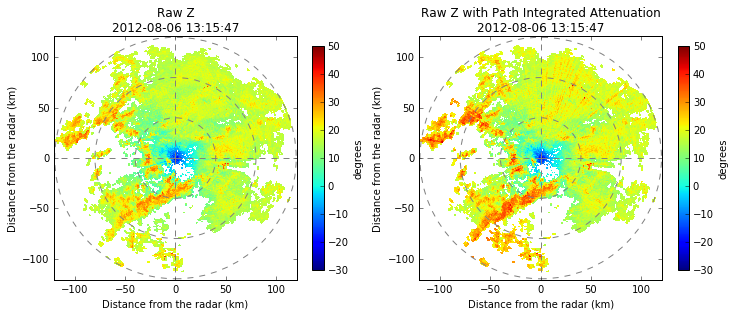

In [14]:
pl.figure(figsize=(12,5))
pl.subplot(121)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_z_RF), r=attrs_z_RF['r']/1000., vmin=-30, vmax=50)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Raw Z\n' + str(attrs_phi_RF['time']))

pl.subplot(122)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(Z_corr), r=attrs_z_RF['r']/1000., vmin=-30, vmax=50)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Raw Z with Path Integrated Attenuation\n' + str(attrs_phi_RF['time']))

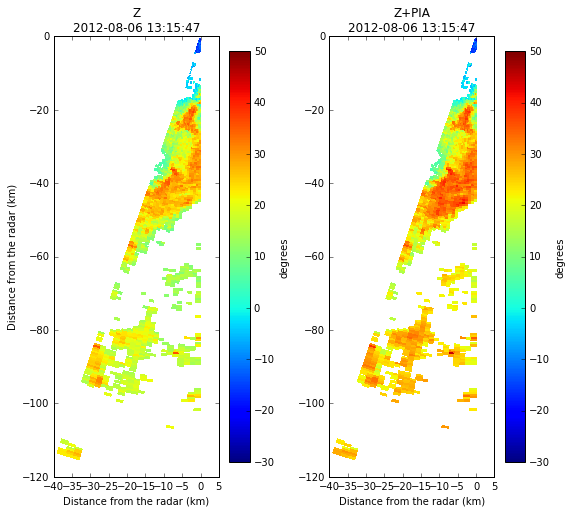

In [33]:
r = attrs_z_RF['r']/1000.
az = np.arange(180,200)

pl.figure(figsize=(8,8))
pl.subplot(121)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_z_RF[190:210]), r=r, az=az, vmin=-30, vmax=50, autoext=False)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Z\n' + str(attrs_phi_RF['time']))

pl.subplot(122)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(Z_corr[190:210]), r=r, az=az, vmin=-30, vmax=50, autoext=False)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('degrees')
pl.xlabel('Distance from the radar (km)')
#pl.ylabel('Distance from the radar (km)')
pl.title('Z+PIA\n' + str(attrs_phi_RF['time']))

pl.tight_layout()